# Heart Disease Prediction using Machine Learning Approach

## 1. Dataset description<a id='data-desc'></a>

This dataset consists of 11 features and a target variable. 

**1. Age:**  Patients Age in years <br>
**2. Sex:**  Gender of patient ; Male - 1, Female - 0<br>
**3. Chest Pain Type:**  Type of chest pain experienced by patient categorized into 1 typical, 2 typical angina, 3 non-anginal pain, 4 asymptomatic <br>
**4. resting bp s:**  Level of blood pressure at resting mode in mm/HG <br>
**5. cholestrol:**  Serum cholestrol in mg/dl <br>
**6. fasting blood sugar:**  Blood sugar levels on fasting > 120 mg/dl represents as 1 in case of true and 0 as false <br>
**7. resting ecg:**  Result of electrocardiogram while at rest are represented in 3 distinct values; 0 : Normal 1: Abnormality in ST-T wave 2: Left ventricular hypertrophy <br>
**8. max heart rate:**  Maximum heart rate achieved <br>
**9. exercise angina:**  Angina induced by exercise; 0 depicting NO 1 depicting Yes <br>
**10. oldpeak:**  Exercise induced ST-depression in comparison with the state of rest <br>
**11. ST slope:**  ST segment measured in terms of slope during peak exercise; 0: Normal 1: Upsloping 2: Flat 3: Downsloping <br>

#### Target variable
**12. target:** The target variable to predict; 1 means patient is suffering from heart risk and 0 means patient is normal.


## 2. Importing Libraries<a id='imp-lib'></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

# data wrangling & pre-processing
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import model_selection

from sklearn.model_selection import train_test_split

#model validation
from sklearn.metrics import log_loss,precision_score,f1_score,accuracy_score,matthews_corrcoef,confusion_matrix,roc_auc_score,recall_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
import xgboost as xgb
from scipy import stats


## 3. Loading Dataset<a id='data-load'></a>

In [2]:
hd = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')

In [3]:
# To check entries of dataset
hd.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


## 4. Data Cleaning & Preprocessing <a id='data-prep'></a>

In [4]:
# Renaming features to appropriate name
hd.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope','target']

In [5]:
# converting features to categorical features 

hd['chest_pain_type'][hd['chest_pain_type'] == 1] = 'typical angina'
hd['chest_pain_type'][hd['chest_pain_type'] == 2] = 'atypical angina'
hd['chest_pain_type'][hd['chest_pain_type'] == 3] = 'non-anginal pain'
hd['chest_pain_type'][hd['chest_pain_type'] == 4] = 'asymptomatic'



hd['rest_ecg'][hd['rest_ecg'] == 0] = 'normal'
hd['rest_ecg'][hd['rest_ecg'] == 1] = 'ST-T wave abnormality'
hd['rest_ecg'][hd['rest_ecg'] == 2] = 'left ventricular hypertrophy'



hd['st_slope'][hd['st_slope'] == 1] = 'upsloping'
hd['st_slope'][hd['st_slope'] == 2] = 'flat'
hd['st_slope'][hd['st_slope'] == 3] = 'downsloping'

hd["sex"] = hd.sex.apply(lambda  x:'male' if x==1 else 'female')

In [6]:
hd['chest_pain_type'].value_counts()

chest_pain_type
asymptomatic        625
non-anginal pain    283
atypical angina     216
typical angina       66
Name: count, dtype: int64

In [7]:
hd['rest_ecg'].value_counts()

rest_ecg
normal                          684
left ventricular hypertrophy    325
ST-T wave abnormality           181
Name: count, dtype: int64

In [8]:
hd['st_slope'].value_counts()

st_slope
flat           582
upsloping      526
downsloping     81
0                1
Name: count, dtype: int64

In [9]:
#dropping row with st_slope =0
hd.drop(hd[hd.st_slope ==0].index, inplace=True)
#checking distribution
hd['st_slope'].value_counts()

st_slope
flat           582
upsloping      526
downsloping     81
Name: count, dtype: int64

In [10]:
# To check the entries of dataset after feature encoding
hd.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,target
0,40,male,atypical angina,140,289,0,normal,172,0,0.0,upsloping,0
1,49,female,non-anginal pain,160,180,0,normal,156,0,1.0,flat,1
2,37,male,atypical angina,130,283,0,ST-T wave abnormality,98,0,0.0,upsloping,0
3,48,female,asymptomatic,138,214,0,normal,108,1,1.5,flat,1
4,54,male,non-anginal pain,150,195,0,normal,122,0,0.0,upsloping,0


In [11]:
## To check missing values in the dataset 
hd.isna().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
target                     0
dtype: int64

## 5. Exploratory Data Analysis (EDA) <a id='data-eda'></a>

In [12]:
# To check the shape of the dataset
hd.shape

(1189, 12)

There are total 1189 records and 11 features with 1 target variable. 

In [13]:
# To display summary statistics of numerical columns
hd.describe(include =['number'])

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,target
count,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000
mean,53.708158,132.138772,210.376787,0.212784,139.739277,0.387721,0.923549,0.528175
std,9.352961,18.369251,101.462185,0.409448,25.527386,0.487435,1.086464,0.499416
min,28.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,120.000000,188.000000,0.000000,121.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,229.000000,0.000000,141.000000,0.000000,0.600000,1.000000
75%,60.000000,140.000000,270.000000,0.000000,160.000000,1.000000,1.600000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000


From the above summary, resting_blood_pressure and cholestrol have some outliers as they have minimum value of 0 whereas cholestrol has outlier on upper side also having maximum value of 603.

In [14]:
# To display summary statistics of categorical columns
hd.describe(include=['object'])

,sex,chest_pain_type,rest_ecg,st_slope
count,1189,1189,1189,1189
unique,2,4,3,3
top,male,asymptomatic,normal,flat
freq,908,625,683,582


### Distribution of Heart disease (target variable)

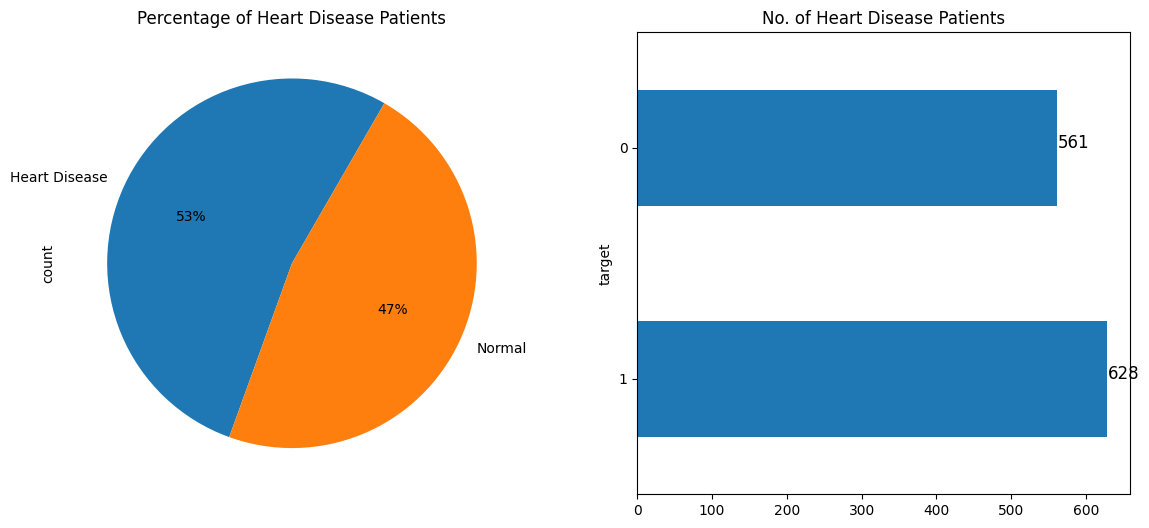

In [15]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pie Chart 
hd['target'].value_counts().plot.pie(autopct="%1.0f%%", labels=["Heart Disease", "Normal"], 
                                     startangle=60, ax=axes[0], 
                                     title="Percentage of Heart Disease Patients")

# Bar Chart 
hd["target"].value_counts().plot(kind="barh", ax=axes[1], 
                                 title="No. of Heart Disease Patients")

# Add labels inside the bars
for i, v in enumerate(hd["target"].value_counts()):
    axes[1].text(v + 1, i, str(v), fontsize=12)

plt.show()


The dataset is balanced having 628 heart disease patients and 561 normal patients

### Gender & Agewise Distribution

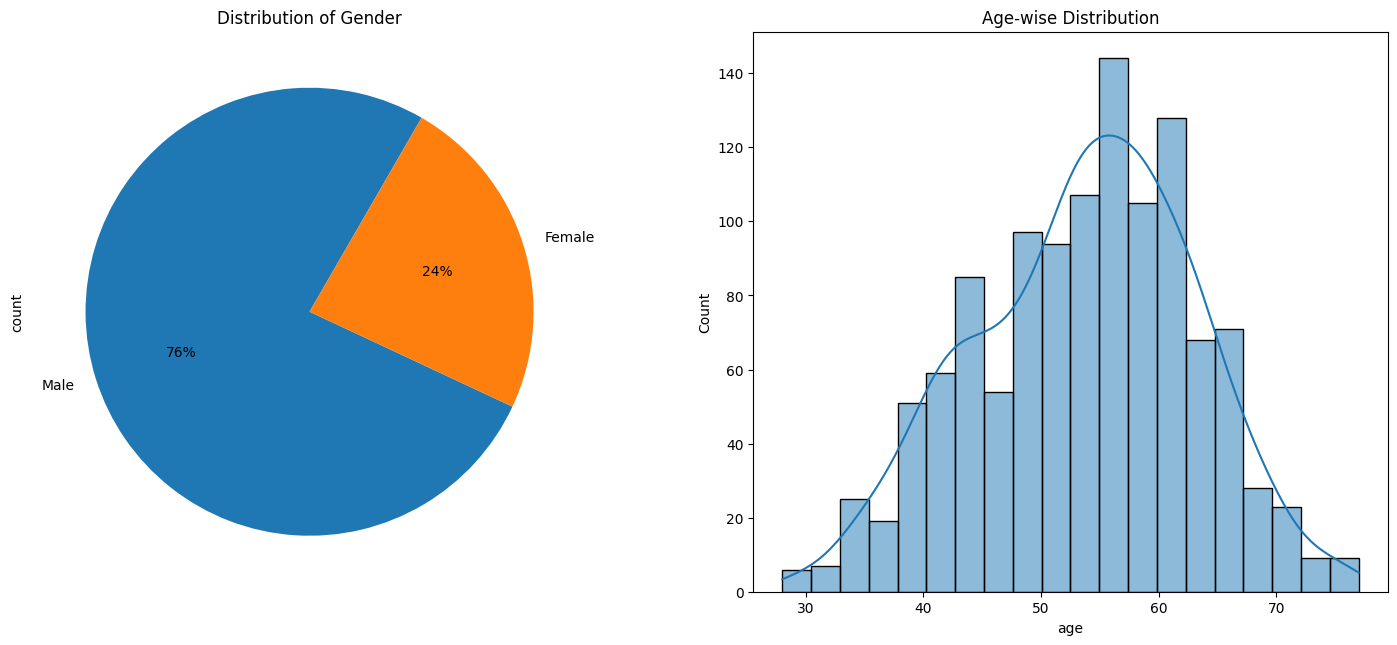

In [16]:
plt.figure(figsize=(18, 16))

# Gender Distribution chart
plt.subplot(221)
hd["sex"].value_counts().plot.pie(autopct="%1.0f%%", startangle=60, labels=["Male", "Female"])
plt.title("Distribution of Gender")

# Age Distribution Plot
plt.subplot(222)
sns.histplot(hd["age"], kde=True)  
plt.title("Age-wise Distribution")

plt.show()


From the above plot, percentage of males is too higher than females where as average age of patients is around 55.

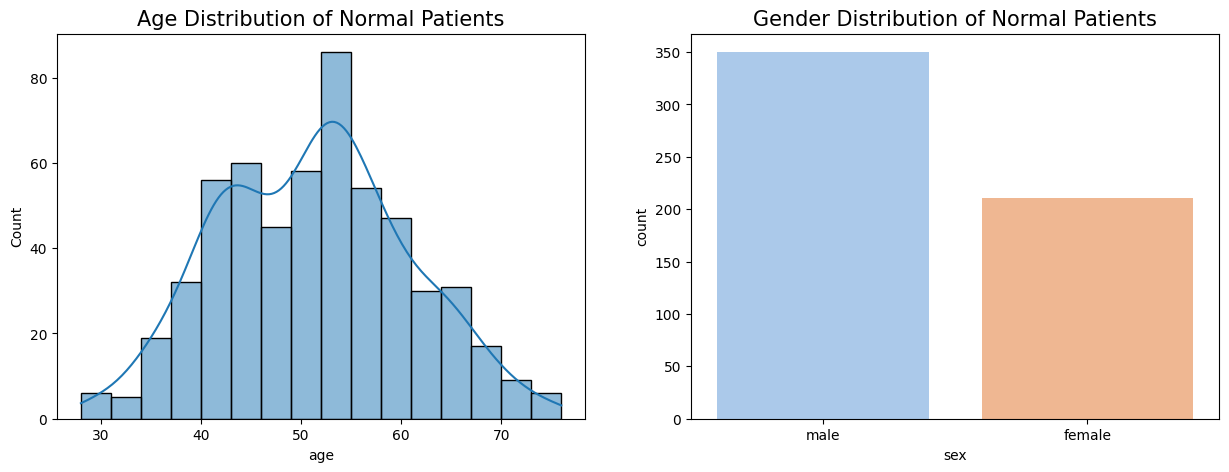

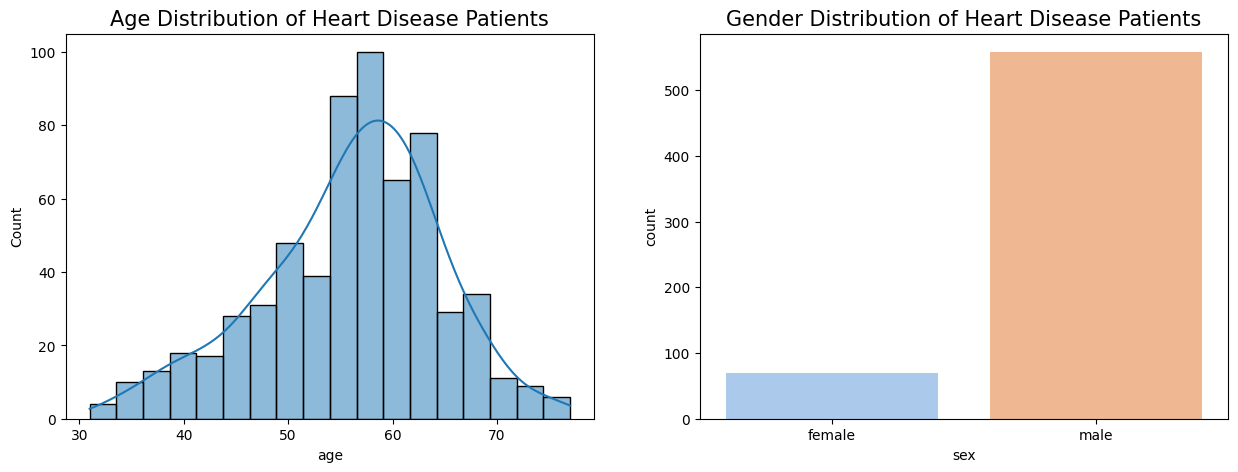

In [17]:
# Create separate DataFrames
attr_1 = hd[hd['target'] == 1]  # Heart disease patients
attr_0 = hd[hd['target'] == 0]  # Normal patients

# Plot Normal Patients
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(attr_0['age'], kde=True, ax=axes[0])
axes[0].set_title('Age Distribution of Normal Patients', fontsize=15)
sns.countplot(x=attr_0['sex'], palette='pastel', ax=axes[1])
axes[1].set_title('Gender Distribution of Normal Patients', fontsize=15)
plt.show()

# Plot Heart Disease Patients
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(attr_1['age'], kde=True, ax=axes[0])
axes[0].set_title('Age Distribution of Heart Disease Patients', fontsize=15)
sns.countplot(x=attr_1['sex'], palette='pastel', ax=axes[1])
axes[1].set_title('Gender Distribution of Heart Disease Patients', fontsize=15)
plt.show()

From the above plot, more patients accounts for heart disease in males compare to females whereas mean age for heart disease patients is around 58 to 60 years

### Distribution of Chest Pain Type

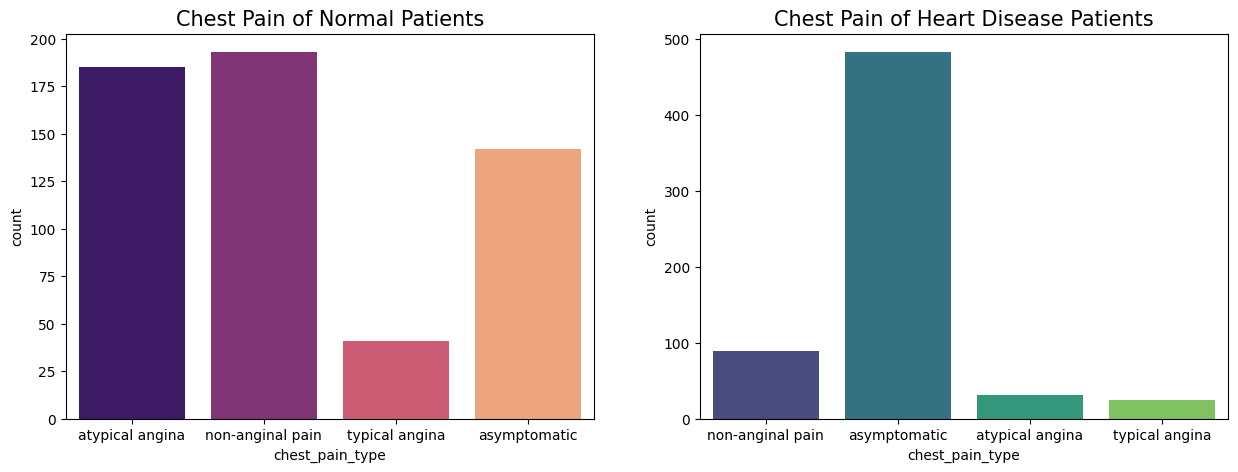

In [18]:
# Plot Normal Patients' Chest Pain
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x=attr_0['chest_pain_type'], palette='magma', ax=axes[0]) 
axes[0].set_title('Chest Pain of Normal Patients', fontsize=15)

# Plot Heart Disease Patients' Chest Pain
sns.countplot(x=attr_1['chest_pain_type'], palette='viridis', ax=axes[1])
axes[1].set_title('Chest Pain of Heart Disease Patients', fontsize=15)

plt.show()


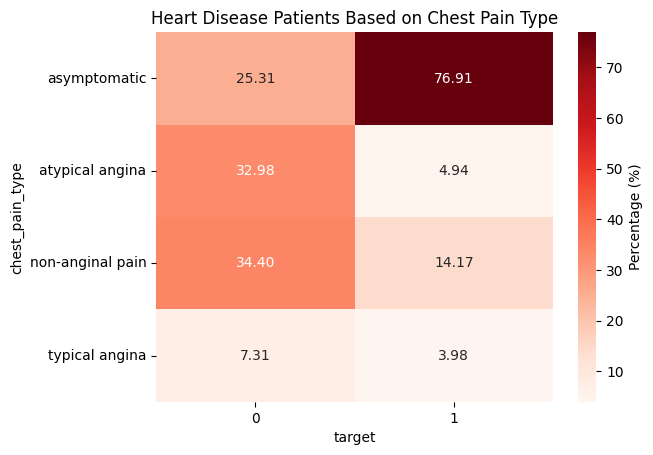

In [19]:
# Exploring the Heart Disease patients based on Chest Pain Type
ct = pd.crosstab(hd['chest_pain_type'], hd['target'], normalize='columns') * 100
sns.heatmap(ct, cmap="Reds", annot=True, fmt=".2f", cbar_kws={'label': 'Percentage (%)'})
plt.title('Heart Disease Patients Based on Chest Pain Type')
plt.show()


From the above plot **76%** of the chest pain type of the heart disease patients have asymptomatic chest pain. 

### Distribution of Rest ECG

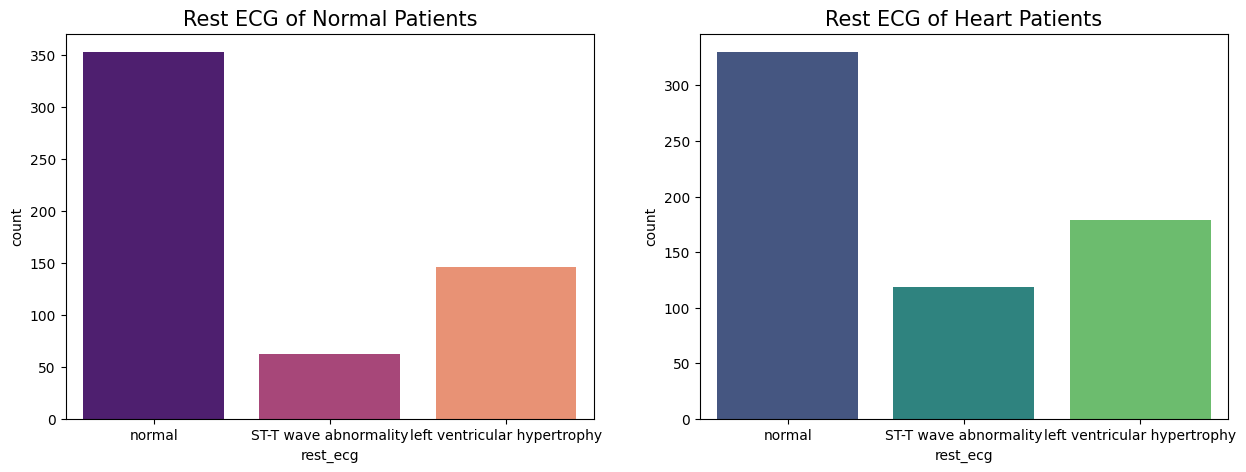

In [20]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Normal Patients (using a different palette)
sns.countplot(x=attr_0['rest_ecg'], palette="magma", ax=axes[0])  
axes[0].set_title('Rest ECG of Normal Patients', fontsize=15)

# Heart Disease Patients (using viridis)
sns.countplot(x=attr_1['rest_ecg'], palette="viridis", ax=axes[1])  
axes[1].set_title('Rest ECG of Heart Patients', fontsize=15)

plt.show()


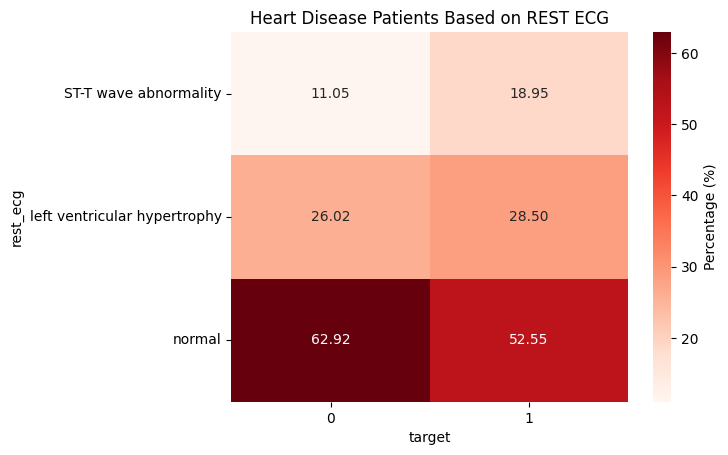

In [21]:
#Exploring the Heart Disease patients based on REST ECG
ct = pd.crosstab(hd['rest_ecg'], hd['target'], normalize='columns') * 100
sns.heatmap(ct, cmap="Reds", annot=True, fmt=".2f", cbar_kws={'label': 'Percentage (%)'})
plt.title('Heart Disease Patients Based on REST ECG')
plt.show()


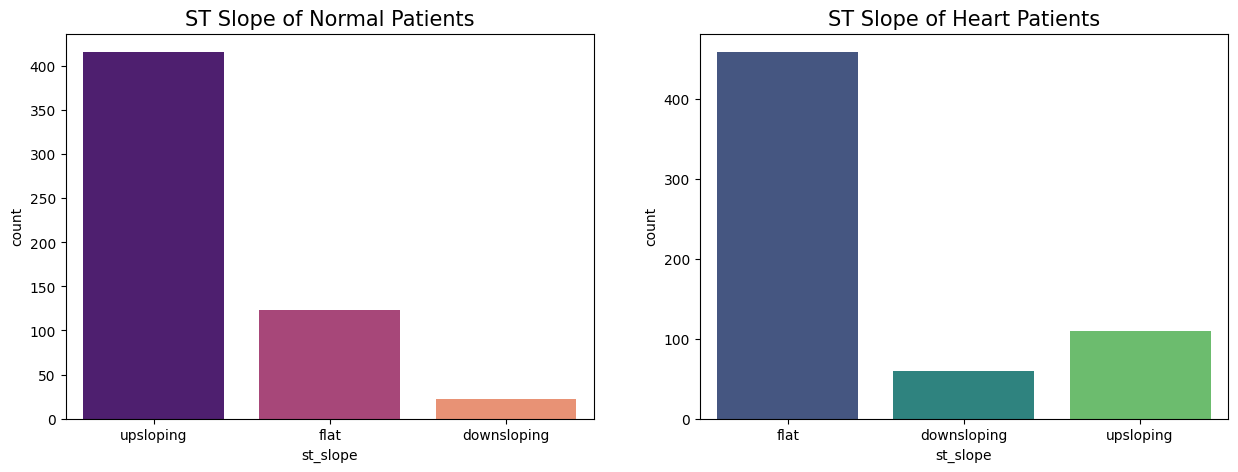

In [22]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot ST Slope for Normal Patients
sns.countplot(x=attr_0['st_slope'], palette="magma", ax=axes[0])
axes[0].set_title('ST Slope of Normal Patients', fontsize=15)

# Plot ST Slope for Heart Disease Patients
sns.countplot(x=attr_1['st_slope'], palette='viridis', ax=axes[1])
axes[1].set_title('ST Slope of Heart Patients', fontsize=15)

plt.show()


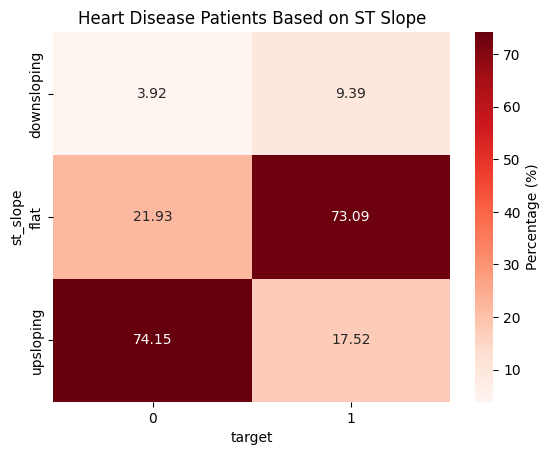

In [23]:
#Exploring the Heart Disease patients based on ST Slope
ct = pd.crosstab(hd['st_slope'], hd['target'], normalize='columns') * 100
sns.heatmap(ct, cmap="Reds", annot=True, fmt=".2f", cbar_kws={'label': 'Percentage (%)'})
plt.title('Heart Disease Patients Based on ST Slope')
plt.show()


From above plot  74.15% of the normal patients have upslope where as 73.09% heart patients have flat sloping.

### Distribution of Numerical features

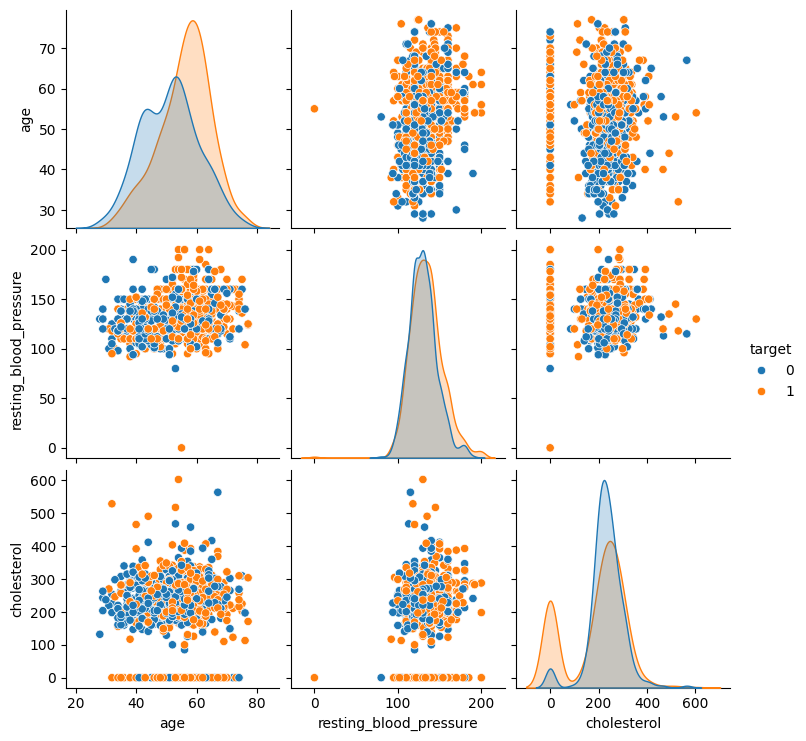

In [24]:
sns.pairplot(hd, hue = 'target', vars = ['age', 'resting_blood_pressure', 'cholesterol'] )

From the above plot it is clear that as the age increases chances of heart disease increases

<Axes: xlabel='resting_blood_pressure', ylabel='cholesterol'>

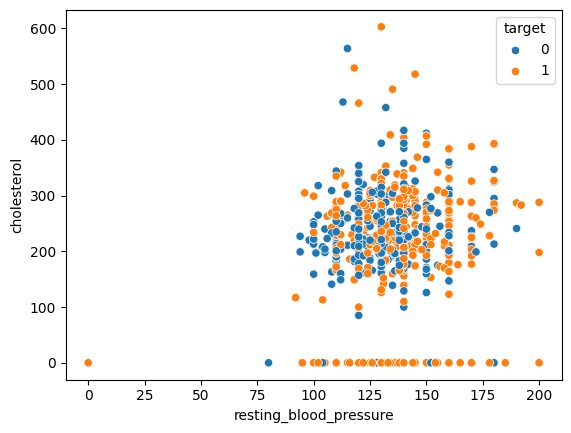

In [25]:
sns.scatterplot( data = hd, hue = 'target', x = 'resting_blood_pressure', y = 'cholesterol')

From the above plot we can see outliers clearly as for some of the patients cholestrol is 0 whereas for one patient both cholestrol and resting bp is 0 which is may be due to missing entries we will filter these ouliers later

<Axes: xlabel='resting_blood_pressure', ylabel='age'>

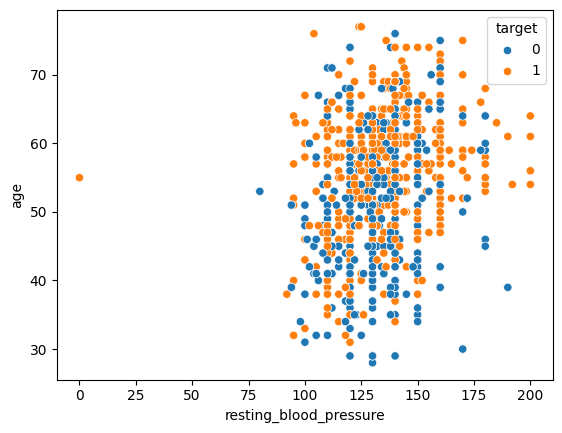

In [26]:
sns.scatterplot(data = hd, hue = 'target', x = 'resting_blood_pressure', y = 'age')

## 6. Outlier Detection & Removal <a id='data-out'></a>

In [27]:
# filtering numeric features as age , resting bp, cholestrol and max heart rate achieved has outliers as per EDA
hd_num = hd[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved']]

In [28]:
hd_num.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved
0,40,140,289,172
1,49,160,180,156
2,37,130,283,98
3,48,138,214,108
4,54,150,195,122


In [29]:
# calculating zscore of numeric columns in the dataset
z = np.abs(stats.zscore(hd_num))
print(z)

           age  resting_blood_pressure  cholesterol  max_heart_rate_achieved
0     1.466266                0.428136     0.775228                 1.264301
1     0.503599                1.517370     0.299516                 0.637259
2     1.787155                0.116481     0.716067                 1.635766
3     0.610562                0.319212     0.035725                 1.243865
4     0.031216                0.972753     0.151616                 0.695204
...        ...                     ...          ...                      ...
1185  0.931451                1.205715     0.528727                 0.303303
1186  1.528698                0.645983     0.171336                 0.049408
1187  0.352105                0.116481     0.782658                 0.969535
1188  0.352105                0.116481     0.252646                 1.342681
1189  1.680192                0.319212     0.348816                 1.303491

[1189 rows x 4 columns]


In [30]:
# Defining threshold for filtering outliers 
threshold = 3
print(np.where(z > 3))

(array([  30,   76,  109,  149,  242,  366,  371,  391,  400,  450,  592,
        617,  733,  760, 1012, 1038, 1074], dtype=int64), array([2, 2, 1, 2, 1, 1, 3, 3, 1, 1, 1, 2, 1, 1, 1, 2, 1], dtype=int64))


In [31]:
#filtering outliers retaining only those data points which are below threshhold
hd = hd[(z < 3).all(axis=1)]

In [32]:
# checking shape of dataset after outlier removal
hd.shape

(1172, 12)

In [33]:
## encoding categorical variables
hd = pd.get_dummies(hd, drop_first=True)

hd.head()


,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping
0,40,140,289,0,172,0,0.0,0,True,True,False,False,False,True,False,True
1,49,160,180,0,156,0,1.0,1,False,False,True,False,False,True,True,False
2,37,130,283,0,98,0,0.0,0,True,True,False,False,False,False,False,True
3,48,138,214,0,108,1,1.5,1,False,False,False,False,False,True,True,False
4,54,150,195,0,122,0,0.0,0,True,False,True,False,False,True,False,True


In [34]:
# checking the shape of dataset
hd.shape

(1172, 16)

In [35]:
# segregating dataset into features X and target variable y
X = hd.drop(['target'],axis=1)
y = hd['target']

## Checking Correlation 

<Axes: title={'center': 'Correlation with Heart Disease'}>

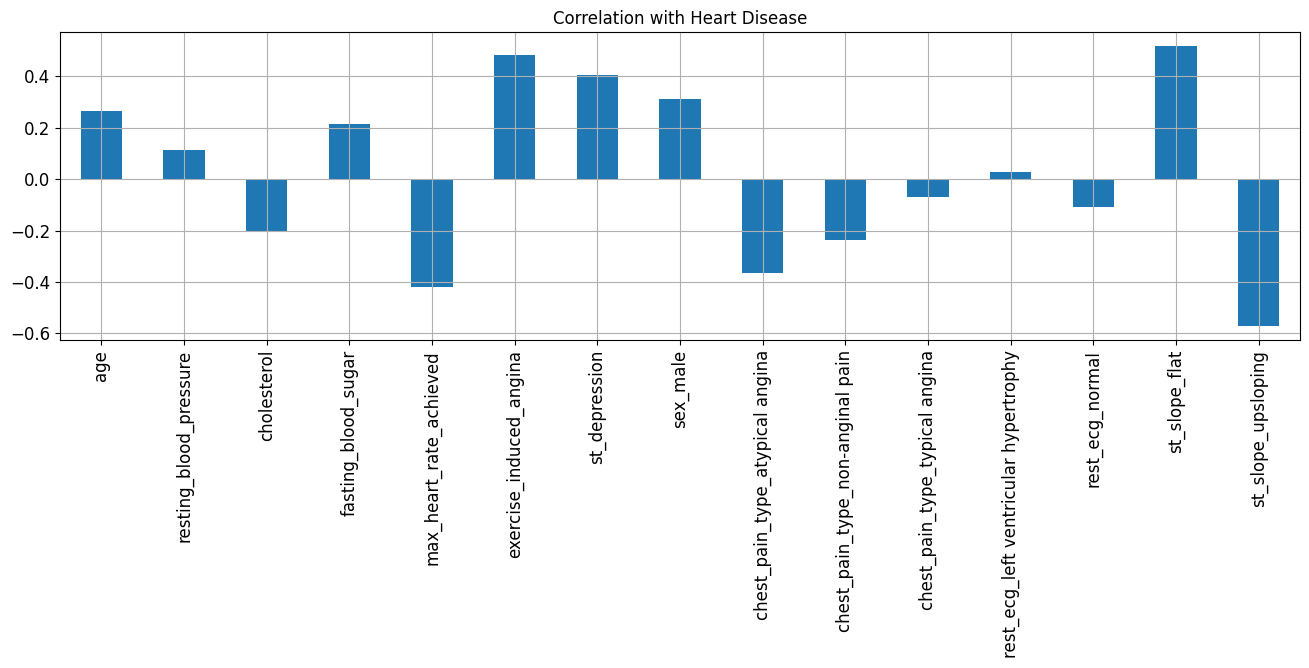

In [36]:
#Correlation with Target Variable 
X.corrwith(y).plot(kind='bar', figsize=(16, 4), title="Correlation with Heart Disease",fontsize = 12, grid = True)

## 7. Train Test Split <a id='data-train'></a>

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

In [38]:
## checking distribution of traget variable in train test split
print('Distribution of traget variable in training set')
print(y_train.value_counts())

print('Distribution of traget variable in test set')
print(y_test.value_counts())

Distribution of traget variable in training set
target
1    491
0    446
Name: count, dtype: int64
Distribution of traget variable in test set
target
1    123
0    112
Name: count, dtype: int64


In [39]:
print('------------Training Set------------------')
print(X_train.shape)
print(y_train.shape)

print('------------Test Set------------------')
print(X_test.shape)
print(y_test.shape)

------------Training Set------------------
(937, 15)
(937,)
------------Test Set------------------
(235, 15)
(235,)


### feature normalization
In this step we will normalize all the numeric feature in the range of 0 to 1

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.fit_transform(X_train[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']])
X_train.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping
478,0.673469,0.193548,0.000000,1,0.303704,1,0.454545,True,False,False,False,False,True,False,False
253,0.673469,0.354839,0.594705,0,0.355556,1,0.194805,True,False,False,False,False,False,False,True
273,0.551020,0.516129,0.409369,0,0.466667,1,0.584416,True,False,False,False,False,True,True,False
111,0.591837,0.623656,0.519348,0,0.185185,1,0.584416,True,False,False,False,False,True,True,False
50,0.448980,0.408602,0.474542,0,0.400000,1,0.454545,True,False,False,False,False,True,True,False


In [41]:
X_test[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.transform(X_test[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']])
X_test.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping
1024,0.693878,0.301075,0.572301,0,0.266667,0,0.376623,True,True,False,False,True,False,True,False
182,0.469388,0.408602,0.456212,0,0.614815,0,0.194805,True,True,False,False,False,True,False,True
785,0.346939,0.494624,0.480652,0,0.629630,1,0.220779,False,False,False,False,True,False,True,False
924,0.591837,0.623656,0.562118,0,0.333333,1,0.272727,True,False,False,False,True,False,True,False
780,0.612245,0.387097,0.527495,0,0.466667,1,0.584416,True,False,False,False,True,False,True,False


## 8. Cross Validation <a id='cross-val'></a>

In this step, we will build different baseline models and perform 10-fold cross validation to filter top performing baseline models to be used in level 0 of stacked ensemble method.

In [42]:
# function initializing baseline machine learning models
def GetBasedModel():
    basedModels = []
    basedModels.append(('KNN7', KNeighborsClassifier(7)))
    basedModels.append(('CART', DecisionTreeClassifier()))
    basedModels.append(('SVM Linear', SVC(kernel='linear', gamma='auto', probability=True)))
    basedModels.append(('RF_Ent100', RandomForestClassifier(criterion='entropy', n_estimators=100)))
    basedModels.append(('XGB_2000', xgb.XGBClassifier(n_estimators=2000)))
    basedModels.append(('MLP', MLPClassifier()))
    
    return basedModels

# function for performing 10-fold cross-validation of selected models
def BasedLine2(X_train, y_train, models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'
    seed = 7
    results = []
    names = []
    for name, model in models:
        kfold = model_selection.KFold(n_splits=num_folds, shuffle=True,random_state=seed)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

    return results, names


In [43]:
models = GetBasedModel()
names,results = BasedLine2(X_train, y_train,models)

KNN7: 0.850538 (0.031620)
CART: 0.875132 (0.013580)
SVM Linear: 0.848421 (0.039710)
RF_Ent100: 0.930531 (0.028273)
XGB_2000: 0.926275 (0.023904)
MLP: 0.872970 (0.039278)


## 9. Model building <a id='data-model'></a>

### Random Forest Classifier (criterion = 'entropy')

In [44]:
rf_ent = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent.fit(X_train, y_train)
y_pred_rfe = rf_ent.predict(X_test)

### Multi Layer Perceptron

In [45]:
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
y_pred_mlp = mlp.predict(X_test)

### K nearest neighbour (n=9)

In [46]:
knn = KNeighborsClassifier(9)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

### XGBoost (n_estimators=500)

In [47]:
import xgboost as xgb
xgb = xgb.XGBClassifier(n_estimators= 500)
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

### Support Vector Classifier (kernel='linear')

In [48]:
svc = SVC(kernel='linear',gamma='auto',probability=True)
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

### decision Tree Classifier (CART)

In [49]:
decc = DecisionTreeClassifier()
decc.fit(X_train,y_train)
y_pred_decc = decc.predict(X_test)

## 10. Model Evaluation  <a id='model-eval'></a>
 

In [50]:
# Dictionary of model predictions
data = {
    'MLP': y_pred_mlp, 
    'KNN': y_pred_knn, 
    'XGB': y_pred_xgb, 
    'SVC': y_pred_svc, 
    'CART': y_pred_decc 
}

models = pd.DataFrame(data)

# Initialize an empty DataFrame for results
model_results = pd.DataFrame(columns=[
    'Model', 'Accuracy', 'Precision', 'Sensitivity', 'Specificity', 
    'F1 Score', 'ROC', 'Log_Loss', 'Mathew_Corrcoef'
])

# Loop through each model's predictions
for column in models:
    CM = confusion_matrix(y_test, models[column])

    TN, FP, FN, TP = CM.ravel()
    
    specificity = TN / (TN + FP)
    loss_log = log_loss(y_test, models[column])
    acc = accuracy_score(y_test, models[column])
    roc = roc_auc_score(y_test, models[column])
    prec = precision_score(y_test, models[column])
    rec = recall_score(y_test, models[column])
    f1 = f1_score(y_test, models[column])
    mathew = matthews_corrcoef(y_test, models[column])
    
    results = pd.DataFrame([[column, acc, prec, rec, specificity, f1, roc, loss_log, mathew]], 
                           columns=model_results.columns)

    model_results = pd.concat([model_results, results], ignore_index=True)

# Remove duplicates if any
model_results = model_results.drop_duplicates().reset_index(drop=True)

print(model_results)


  Model  Accuracy  Precision  Sensitivity  Specificity  F1 Score       ROC  \
0   MLP  0.817021   0.789855     0.886179     0.741071  0.835249  0.813625   
1   KNN  0.808511   0.786765     0.869919     0.741071  0.826255  0.805495   
2   XGB  0.893617   0.865672     0.943089     0.839286  0.902724  0.891188   
3   SVC  0.825532   0.801471     0.886179     0.758929  0.841699  0.822554   
4  CART  0.829787   0.821705     0.861789     0.794643  0.841270  0.828216   

   Log_Loss  Mathew_Corrcoef  
0  6.595222         0.636322  
1  6.901976         0.618029  
2  3.834431         0.789339  
3  6.288467         0.652539  
4  6.135090         0.658875  


### Findings
- XGBoost Classifier is best performer as it has highest test accuracy of 0.89, sensitivity of 0.943 and specificity of 0.839 and highest f1-score of 0.90 and lowest Log Loss of 3.83.


## Feature Importance

<Axes: >

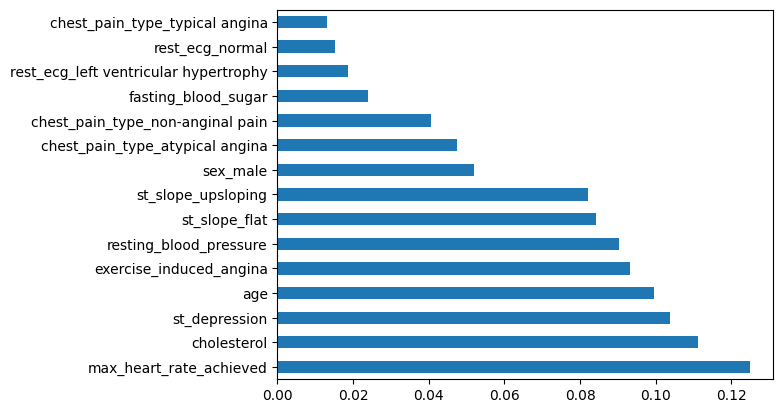

In [51]:
feat_importances = pd.Series(rf_ent.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

## Conclusion  <a id='data-conc'></a>


- XGBoost Classifier is the best performing algorithm
- The top 3 most contribution features are:
1. **Max heart Rate achieved**<br>
2. **Cholestrol**<br>
3. **st_depression**<br>
